In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')

os.chdir("drive/MyDrive/圖形識別")

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('diabetes.csv')
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [803]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Outcome']) 
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
x_train = X_train.to_numpy()
x_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [1009]:
from sklearn.neighbors import KNeighborsClassifier

config_n = list(range(1, 30)) #n_neighbors
config_p = list(range(1, 30)) #minkowski
ans = []
for n in config_n:
  for p in config_p:
    knn = KNeighborsClassifier(n_neighbors = n, p=p) 
    knn.fit(X_train,y_train)
    s = knn.score(X_test,y_test)
    ans.append([n,p,s])
ans = np.array(ans)
ans[:3]

array([[1.        , 1.        , 0.71428571],
       [1.        , 2.        , 0.64935065],
       [1.        , 3.        , 0.62987013]])

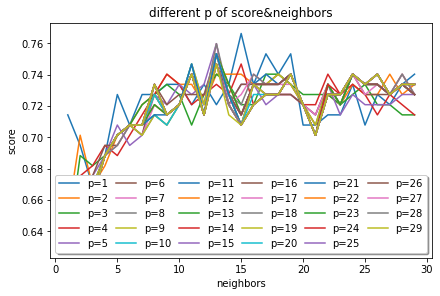

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(constrained_layout=True)
ax.set_title('different p of score&neighbors')
for p in config_p:
  data = ans[ans[:,1]==p]
  ax.plot(data[:,0], data[:,2], label=f"p={p}")
leg = plt.legend(loc='best', ncol=6, mode="expand", shadow=True, fancybox=True)
ax.set_xlabel('neighbors')
ax.set_ylabel('score')

plt.show()

## Tensorflow implementation

In [782]:
import tensorflow as tf
from sklearn.metrics import accuracy_score

In [1036]:

class TF_KNeighborsClassifier:
    def __init__(self, n_neighbors=2, p=2):
        self.n_neighbors = n_neighbors
        self.p = p
    def fit(self, X, y):
        self.X = tf.convert_to_tensor(X)
        self.y = tf.convert_to_tensor(y)
    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            d = tf.map_fn(self.Manhattan_distance,x) 
            min_d_idx = tf.argsort(d)[:self.n_neighbors]
            # find nearest neighbors's label 
            nearest_neighbors_label = []
            for i in min_d_idx:
                nearest_neighbors_label.append(self.y[i])
            # find mode 
            y, idx, count = tf.unique_with_counts(nearest_neighbors_label)
            #y_pred.append( y[tf.argmax(count)] ) # slower 
            y_pred.append( tf.slice(y, begin=[tf.argmax(count, 0)], size=tf.constant([1], dtype=tf.int64))[0] ) #faster
        y_pred = np.array(y_pred)
        return y_pred
    def score(self,X_test, y_test):
        return accuracy_score(self.predict(X_test), y_test)
    def Manhattan_distance(self,x_test):
        return tf.math.pow( tf.reduce_sum( tf.math.pow(tf.math.abs( tf.subtract(self.X,x_test) ),self.p) ) , 1.0/self.p)
knn = TF_KNeighborsClassifier(n_neighbors=3,p=2)
knn.fit(x_train,y_train)

#y_pred = knn.predict(x_test)
#y_pred
result = knn.score(X_test=x_test,y_test=y_test)
result


0.5194805194805194

In [998]:
knn = KNeighborsClassifier(n_neighbors = 2, p=2) 
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7012987012987013

In [1041]:
from sklearn.neighbors import KNeighborsClassifier

config_n = list(range(1, 10)) #n_neighbors
config_p = list(range(1, 5)) #minkowski
ans = []
for n in config_n:
    for p in config_p:
        knn = TF_KNeighborsClassifier(n_neighbors = n, p=p) 
        knn.fit(x_train,y_train)
        
        s = knn.score(x_test,y_test)
        ans.append([n,p,s])
ans = np.array(ans)
ans[:3]

array([[1.        , 1.        , 0.47402597],
       [1.        , 2.        , 0.52597403],
       [1.        , 3.        , 0.5974026 ]])

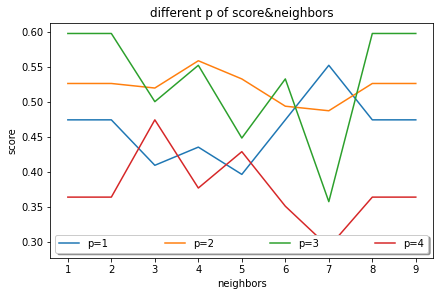

In [1042]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(constrained_layout=True)
ax.set_title('different p of score&neighbors')
for p in config_p:
  data = ans[ans[:,1]==p]
  ax.plot(data[:,0], data[:,2], label=f"p={p}")
leg = plt.legend(loc='best', ncol=6, mode="expand", shadow=True, fancybox=True)
ax.set_xlabel('neighbors')
ax.set_ylabel('score')

plt.show()